# Lab 5

Integrantes:
- Francis Aguilar, 
- César López, 
- Jose Marchena, 22398

Repo:
https://github.com/Czar272/Lab5VxC.git

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")

In [24]:
# === SET DE CONTROL (Rotación pura) ===
img_left_control = cv2.imread("db/control_left.jpg")
img_right_control = cv2.imread("db/control_right.jpg")

# === SET EXPERIMENTAL (Con traslación) ===
img_left_exp = cv2.imread("db/exp_left.jpg")
img_right_exp = cv2.imread("db/exp_right.jpg")

In [25]:
def stitch_images(img_left, img_right):
    
    gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

    orb = cv2.ORB_create(2000)
    kp1, des1 = orb.detectAndCompute(gray_left, None)
    kp2, des2 = orb.detectAndCompute(gray_right, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des2, des1)
    matches = sorted(matches, key=lambda x: x.distance)

    pts_right = np.float32([kp2[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    pts_left = np.float32([kp1[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

    H, mask = cv2.findHomography(pts_right, pts_left, cv2.RANSAC, 5.0)

    height, width = img_left.shape[:2]
    panorama = cv2.warpPerspective(img_right, H, (width*2, height))
    panorama[0:height, 0:width] = img_left

    return panorama

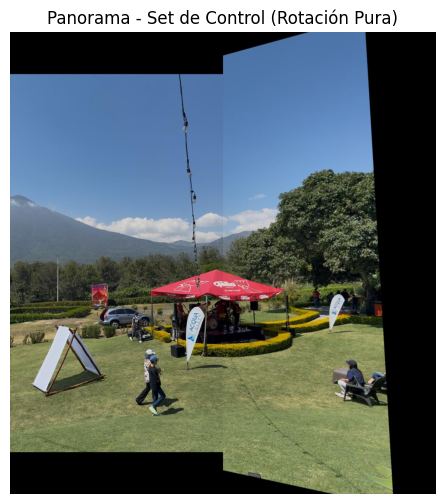

In [26]:
panorama_control = stitch_images(img_left_control, img_right_control)
show_image(panorama_control, "Panorama - Set de Control (Rotación Pura)")

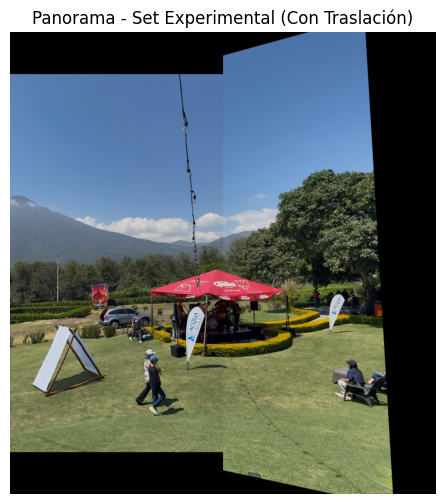

In [27]:
panorama_exp = stitch_images(img_left_exp, img_right_exp)
show_image(panorama_exp, "Panorama - Set Experimental (Con Traslación)")

In [28]:
cv2.imwrite("Resultls/resultado_control.jpg", panorama_control)
cv2.imwrite("Resultls/resultado_experimental.jpg", panorama_exp)

True